In [87]:
import numpy as np
import os
import matplotlib.pyplot as plt
from common import Reward, Action
from icecream import ic

In [97]:
output_dir = "output/20250813-0009-alignment"

# config
T = 100000
trials = range(10)
algs = ["IDS"]
K = 32
base_seed = 11

num_trials = len(trials)
num_algs = len(algs)
K = 32
K_env = K // 2

all_regrets = np.zeros((num_trials, num_algs, T), dtype=Reward)
all_actions = np.zeros((num_trials, num_algs, T), dtype=Action)


def generate_base_filename(base_seed: int, trial_id: int, alg_label: str) -> str:
    return f"{alg_label}_seed{base_seed}_id{trial_id}.npy"


for i, trial_id in enumerate(trials):
    for alg in algs:
        filename = generate_base_filename(base_seed, trial_id, alg)
        with open(os.path.join(output_dir, f"regrets_{filename}"), "rb") as f:
            all_regrets[i] = np.load(f)
        with open(os.path.join(output_dir, f"actions_{filename}"), "rb") as f:
            all_actions[i] = np.load(f)

In [98]:
selected_alg = 0

regrets_IDS = all_regrets[:, selected_alg, :]
actions_IDS = all_actions[:, selected_alg, :]

In [99]:
env_actions = (actions_IDS < 16).astype(int)
human_actions = 1 - env_actions

cum_env_actions = np.cumsum(env_actions, axis=1)
cum_human_actions = np.cumsum(human_actions, axis=1)

In [100]:
ic(actions_IDS)
ic(human_actions)
ic(cum_human_actions)

ic| actions_IDS: array([[ 2, 12, 13, ..., 14, 14, 14],
                        [11,  5, 13, ...,  5,  5,  5],
                        [ 8,  0, 15, ...,  9,  9,  2],
                        ...,
                        [ 0,  4,  6, ...,  4,  4,  4],
                        [11,  9,  4, ...,  8,  8,  8],
                        [15,  3, 13, ...,  3,  3,  3]], shape=(10, 100000), dtype=uint8)
ic| human_actions: array([[0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0],
                          ...,
                          [0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0]], shape=(10, 100000))
ic| cum_human_actions: array([[   0,    0,    0, ...,  204,  204,  204],
                              [   0,    0,    0, ...,  228,  228,  228],
                              [   0,    0,    0, ..., 4896, 4896, 4896],
                              

array([[   0,    0,    0, ...,  204,  204,  204],
       [   0,    0,    0, ...,  228,  228,  228],
       [   0,    0,    0, ..., 4896, 4896, 4896],
       ...,
       [   0,    0,    0, ...,  142,  142,  142],
       [   0,    0,    0, ...,  109,  109,  109],
       [   0,    0,    0, ...,  113,  113,  113]], shape=(10, 100000))

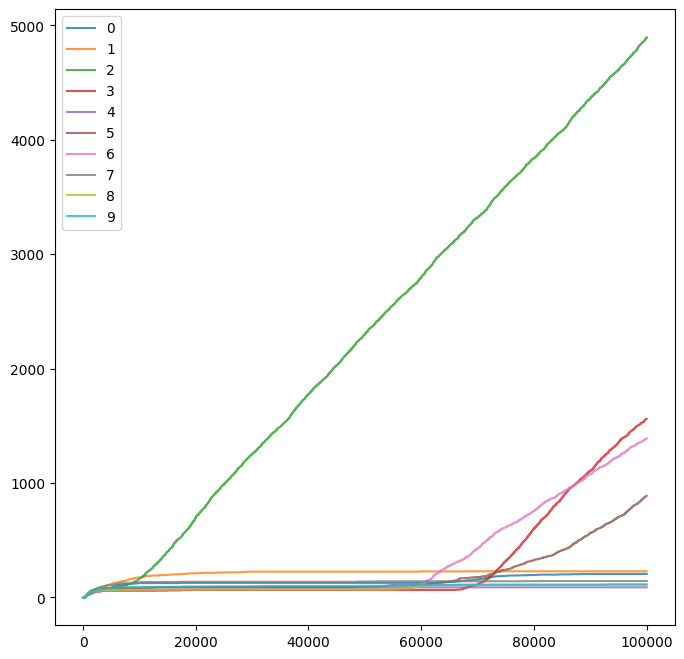

In [107]:
plt.figure(figsize=(8, 8))
for i in range(len(all_actions)):
    # plt.plot(np.arange(T), cum_human_actions[i], color="red", alpha=0.3)
    plt.plot(np.arange(T), cum_human_actions[i], label=i, alpha=0.8)

# min_t = len(all_actions[0])

# plt.plot(np.arange(10, min_t, 1), np.mean(cum_human_actions, axis=0)[10:])
# plt.fill_between(np.arange(10, min_t, 1), np.mean(cum_human_actions, axis=0)[10:] + np.std(cum_human_actions, axis=0)[10:], np.mean(cum_human_actions, axis=0)[10:] - np.std(cum_human_actions, axis=0)[10:], alpha=0.3)

sqrt_t = np.sqrt(np.arange(10, T, 1))
sqrt_t_log_t = np.sqrt(np.arange(10, T, 1)) * np.log(np.arange(10, T, 1))
log_t = np.log(np.arange(10, T, 1)) * np.log(np.arange(10, T, 1))

# plt.plot(np.arange(10, T, 1), np.arange(10, T, 1), color="black", linestyle="--")
# plt.plot(np.arange(10, T, 1), 30 * sqrt_t_log_t, color="black", linestyle="--")
# plt.plot(np.arange(10, T, 1), log_t**2, color="black", linestyle="--")
# plt.plot(np.arange(10, T, 1), 30 * sqrt_t, color="black", linestyle="--")

# plt.xscale("log")
# plt.yscale("log")
# plt.axis("equal")

plt.legend()
plt.show()

In [105]:
actions = actions_IDS[2]

In [106]:
unique, counts = np.unique(actions, return_counts=True)

for i in range(16):
    ic(f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}")

n_h = sum(counts[16:])
n_env = sum(counts[:16])
ic(n_h)
ic(f"proportion: {n_h / (n_h + n_env)}")

ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '0: 4736		 0h: 313'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '1: 6863		 1h: 323'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '2: 2790		 2h: 309'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '3: 1914		 3h: 302'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '4: 3582		 4h: 305'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '5: 1940		 5h: 317'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '6: 2412		 6h: 310'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '7: 3087		 7h: 314'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '8: 2225		 8h: 311'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '9: 45117		 9h: 309'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '10: 2874		 10h: 304'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '11: 2054		 11h: 310'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '12: 4501		 12h: 288'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '13: 

'proportion: 0.04896'

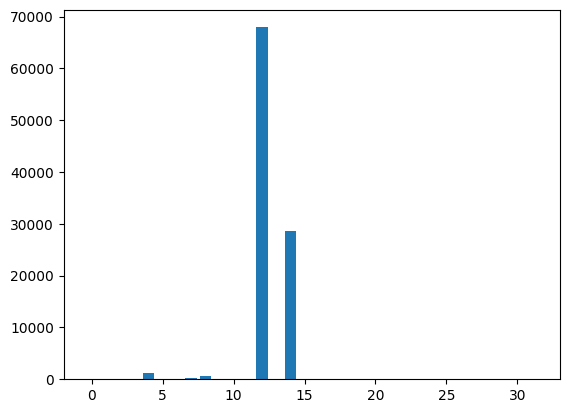

In [104]:
plt.bar(unique, counts)
plt.show()